In [1]:
import mysql.connector

In [2]:
def get_db():
    db = mysql.connector.connect(
        host='localhost',
        user='root',
        password='@Navarrete2311',
        database='pruebas'
    )
    c = db.cursor(dictionary=True)
    return db, c

In [11]:
def get_emotions(entries):
    return pd.DataFrame(entries)

In [3]:
db, c = get_db()

In [6]:
db, c = get_db()
c.execute(
    'SELECT e.id, e.emotion, e.description, e.created_at, e.modified_at'
    ' FROM entries e JOIN users u ON e.created_by = u.id'
    ' WHERE e.created_by = %s ORDER BY modified_at DESC',
    (2,)
)

entries = c.fetchall()

In [7]:
entries

[{'id': 43,
  'emotion': 'angry',
  'description': 'This is a description',
  'created_at': datetime.datetime(2024, 6, 15, 0, 43, 44),
  'modified_at': datetime.datetime(2024, 6, 15, 0, 43, 44)},
 {'id': 41,
  'emotion': 'angry',
  'description': 'New entrie',
  'created_at': datetime.datetime(2024, 6, 14, 16, 56, 31),
  'modified_at': datetime.datetime(2024, 6, 15, 0, 26, 29)},
 {'id': 42,
  'emotion': 'sad',
  'description': 'Nada nuevo, es una prueba',
  'created_at': datetime.datetime(2024, 6, 15, 0, 26, 16),
  'modified_at': datetime.datetime(2024, 6, 15, 0, 26, 16)},
 {'id': 40,
  'emotion': 'happy',
  'description': 'Hi!',
  'created_at': datetime.datetime(2024, 6, 14, 16, 55, 40),
  'modified_at': datetime.datetime(2024, 6, 14, 16, 55, 40)},
 {'id': 39,
  'emotion': 'good',
  'description': 'New entry jeje',
  'created_at': datetime.datetime(2024, 6, 14, 14, 21, 2),
  'modified_at': datetime.datetime(2024, 6, 14, 14, 55, 8)},
 {'id': 37,
  'emotion': 'happy',
  'description': '

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from io import BytesIO
matplotlib.use('agg') # This needs to happen before any pyplot import!!!
%matplotlib inline


/var/folders/ww/b4znpwnj1pn98_xzv10y543h0000gn/T/ipykernel_56314/766290490.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


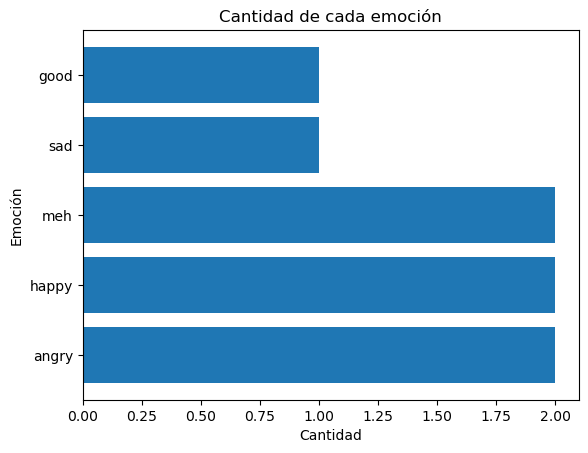

In [66]:
data = get_emotions(entries)
fig, ax = plt.subplots()
#ax = fig.subplots()
emotion_counts = data['emotion'].value_counts()
ax.barh(emotion_counts.index, emotion_counts.values)

# Añadir etiquetas y título
ax.set_xlabel('Cantidad')
ax.set_ylabel('Emoción')
ax.set_title('Cantidad de cada emoción')
# Save it to a temporary buffer.
# buf = BytesIO()
#fig.savefig(buf, format="png")
fig.show()

In [63]:
pd.DataFrame(data.emotion.value_counts())

,count
emotion,
angry,2
happy,2
meh,2
sad,1
good,1


In [43]:
em = dict(data['emotion'].value_counts())

In [45]:
em.keys()

dict_keys(['angry', 'happy', 'meh', 'sad', 'good'])

In [57]:
em.values()

dict_values([2, 2, 2, 1, 1])